In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

C:\Users\nksha\AppData\Local\Temp\ipykernel_8688\3256063811.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('data/calories_data.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
X = df.drop(columns=['Calories'],axis=1)

In [5]:
X.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'gender' variable:      ['male' 'female']


In [7]:
y = df['Calories']

In [8]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(15000, 9)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((10500, 9), (4500, 9))

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11.2164
- Mean Absolute Error: 8.2787
- R2 Score: 0.9676
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5296
- Mean Absolute Error: 8.4484
- R2 Score: 0.9663


Lasso
Model performance for Training set
- Root Mean Squared Error: 12.2046
- Mean Absolute Error: 8.9818
- R2 Score: 0.9616
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.5537
- Mean Absolute Error: 9.1578
- R2 Score: 0.9601


Ridge
Model performance for Training set
- Root Mean Squared Error: 11.2163
- Mean Absolute Error: 8.2793
- R2 Score: 0.9676
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5294
- Mean Absolute Error: 8.4493
- R2 Score: 0.9663


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6905
- Mean Absolute Error: 4.1585
- R2 Score: 0.9917
-----------------

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"])

,Model Name,R2_Score
1,Lasso,0.960076
8,AdaBoost Regressor,0.965462
0,Linear Regression,0.966324
2,Ridge,0.966326
3,K-Neighbors Regressor,0.987822
4,Decision Tree,0.991548
5,Random Forest Regressor,0.997541
6,XGBRegressor,0.998691
7,CatBoosting Regressor,0.999831


In [16]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.059365
0:	learn: 58.9866692	total: 3.68ms	remaining: 3.68s
1:	learn: 55.9180163	total: 8.46ms	remaining: 4.22s
2:	learn: 52.9426363	total: 11.3ms	remaining: 3.77s
3:	learn: 50.1727120	total: 14.3ms	remaining: 3.55s
4:	learn: 47.6496569	total: 17.1ms	remaining: 3.4s
5:	learn: 45.2204363	total: 20.2ms	remaining: 3.35s
6:	learn: 42.8145873	total: 23.6ms	remaining: 3.35s
7:	learn: 40.6282021	total: 26.7ms	remaining: 3.31s
8:	learn: 38.5717233	total: 29.5ms	remaining: 3.24s
9:	learn: 36.6593395	total: 32.4ms	remaining: 3.2s
10:	learn: 34.8283698	total: 35.1ms	remaining: 3.16s
11:	learn: 33.1513333	total: 39.1ms	remaining: 3.22s
12:	learn: 31.4477918	total: 42ms	remaining: 3.18s
13:	learn: 29.9304452	total: 44.9ms	remaining: 3.16s
14:	learn: 28.4460750	total: 47.5ms	remaining: 3.12s
15:	learn: 27.0125895	total: 50ms	remaining: 3.08s
16:	learn: 25.7223971	total: 53.6ms	remaining: 3.1s
17:	learn: 24.5300402	total: 56.7ms	remaining: 3.09s
18:	learn: 23.3296038	total: 59.3

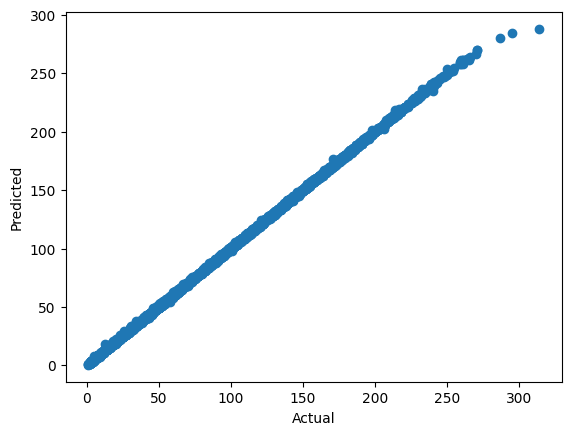

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

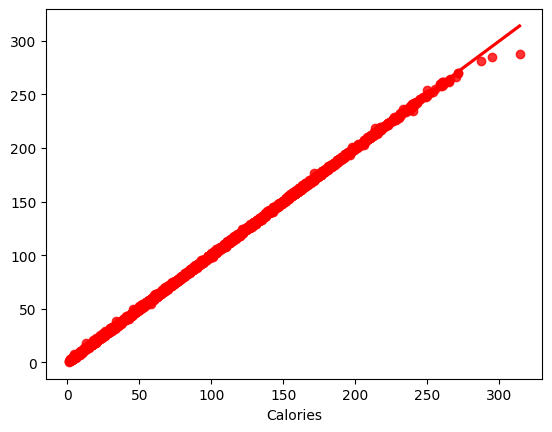

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11499,173.0,172.492048,0.507952
6475,189.0,189.943206,-0.943206
13167,53.0,53.719055,-0.719055
862,161.0,162.061816,-1.061816
5970,226.0,224.661453,1.338547
...,...,...,...
4217,40.0,39.991830,0.008170
13886,38.0,38.611306,-0.611306
10464,30.0,31.877604,-1.877604
6902,198.0,198.247036,-0.247036
